## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

## Data Loading

In [2]:
# Load the data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

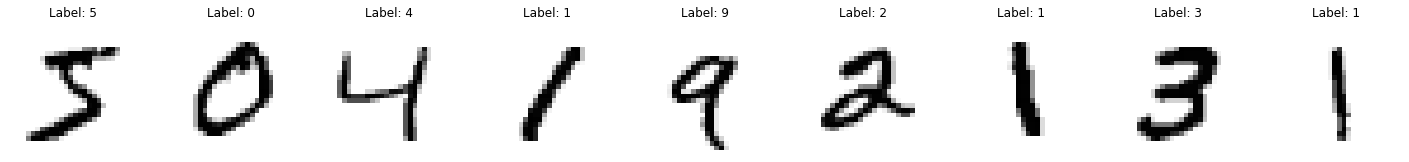

In [3]:
plt.figure(figsize=(25, 6))
for i in range(9):
    plt.subplot(1, 9, i+1)
    plt.imshow(X_train[i], cmap='binary')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

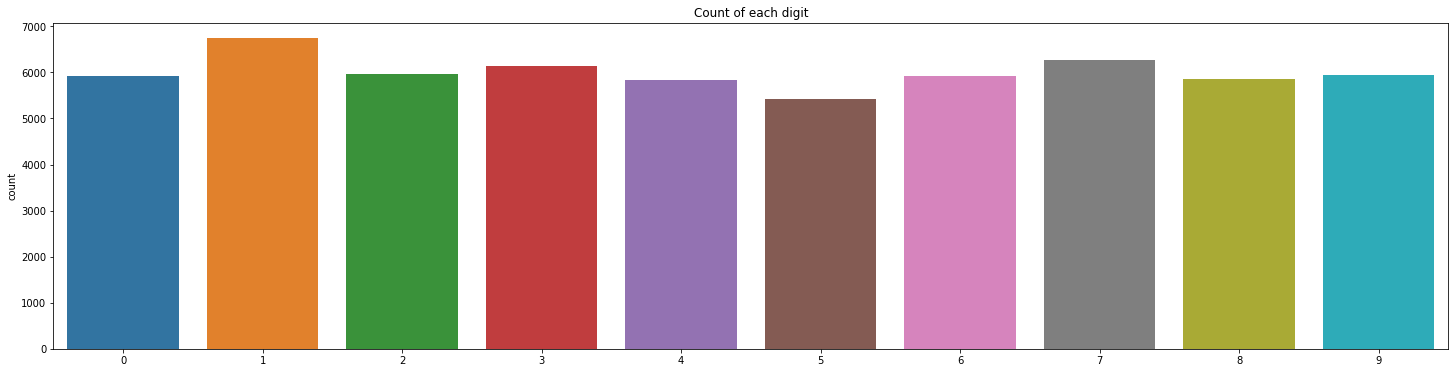

In [4]:
plt.figure(figsize=(25, 6))
sns.countplot(x=y_train)
plt.title('Count of each digit')
plt.show()

## Data Preprocessing

In [5]:
# Concatenate the training and test data as features and labels
features = np.concatenate((X_train, X_test), axis=0)
labels = np.concatenate((y_train, y_test), axis=0)

# Create a dataframe with the features and the labels
dataset = tf.data.Dataset.from_tensor_slices((features, labels))

# Split the data into training, validation and test sets
train_dataset = dataset.take(int(len(dataset) * 0.8)).shuffle(len(dataset)).batch(23)
val_dataset = dataset.skip(int(len(dataset) * 0.8)).take(int(len(dataset) * 0.1)).batch(23)
test_dataset = dataset.skip(int(len(dataset) * 0.9)).batch(23)

In [6]:
print(f'Train dataset size: {len(train_dataset)}')
print(f'Validation dataset size: {len(val_dataset)}')
print(f'Test dataset size: {len(test_dataset)}')

Train dataset size: 2435
Validation dataset size: 305
Test dataset size: 305


## Modeling

In [7]:
def create_model(initializer):
    # Create the model
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer=initializer,input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer=initializer))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

### Initializer

In [8]:
history = {}

#### Glorot Normal

In [9]:
model_glorot = create_model(initializer=tf.keras.initializers.glorot_normal())
model_glorot.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

In [10]:
history['glorot'] = model_glorot.fit(train_dataset, epochs=10, validation_data=val_dataset, verbose=1).history

Epoch 1/10
2435/2435 [==============================] - 16s 4ms/step - loss: 0.6704 - accuracy: 0.8611 - val_loss: 0.1134 - val_accuracy: 0.9706
Epoch 2/10
2435/2435 [==============================] - 9s 4ms/step - loss: 0.1758 - accuracy: 0.9505 - val_loss: 0.1014 - val_accuracy: 0.9706
Epoch 3/10
2435/2435 [==============================] - 9s 4ms/step - loss: 0.1363 - accuracy: 0.9606 - val_loss: 0.0946 - val_accuracy: 0.9740
Epoch 4/10
2435/2435 [==============================] - 10s 4ms/step - loss: 0.1159 - accuracy: 0.9668 - val_loss: 0.0759 - val_accuracy: 0.9769
Epoch 5/10
2435/2435 [==============================] - 10s 4ms/step - loss: 0.1021 - accuracy: 0.9716 - val_loss: 0.0773 - val_accuracy: 0.9806
Epoch 6/10
2435/2435 [==============================] - 11s 5ms/step - loss: 0.0886 - accuracy: 0.9749 - val_loss: 0.0819 - val_accuracy: 0.9796
Epoch 7/10
2435/2435 [==============================] - 10s 4ms/step - loss: 0.0873 - accuracy: 0.9756 - val_loss: 0.0814 - val_accu

#### He Normal

In [11]:
model_he = create_model(initializer=tf.keras.initializers.he_normal())
model_he.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                      

In [12]:
history['he'] = model_he.fit(train_dataset, epochs=10, validation_data=val_dataset, verbose=1).history

Epoch 1/10
2435/2435 [==============================] - 11s 4ms/step - loss: 3.6935 - accuracy: 0.2456 - val_loss: 1.8384 - val_accuracy: 0.3131
Epoch 2/10
2435/2435 [==============================] - 11s 5ms/step - loss: 1.9620 - accuracy: 0.2688 - val_loss: 1.6563 - val_accuracy: 0.3684
Epoch 3/10
2435/2435 [==============================] - 10s 4ms/step - loss: 1.8379 - accuracy: 0.2997 - val_loss: 1.6269 - val_accuracy: 0.3773
Epoch 4/10
2435/2435 [==============================] - 10s 4ms/step - loss: 1.7919 - accuracy: 0.3180 - val_loss: 1.5645 - val_accuracy: 0.3790
Epoch 5/10
2435/2435 [==============================] - 11s 4ms/step - loss: 1.7457 - accuracy: 0.3294 - val_loss: 1.5206 - val_accuracy: 0.3836
Epoch 6/10
2435/2435 [==============================] - 10s 4ms/step - loss: 1.6411 - accuracy: 0.3912 - val_loss: 1.1988 - val_accuracy: 0.5440
Epoch 7/10
2435/2435 [==============================] - 9s 4ms/step - loss: 1.3414 - accuracy: 0.5084 - val_loss: 0.9864 - val_acc

#### Random Normal

In [13]:
model_random = create_model(initializer=tf.keras.initializers.random_normal())
model_random.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               692352    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                      

In [14]:
history['random'] = model_random.fit(train_dataset, epochs=10, validation_data=val_dataset, verbose=1).history

Epoch 1/10
2435/2435 [==============================] - 10s 4ms/step - loss: 0.8596 - accuracy: 0.8759 - val_loss: 0.1016 - val_accuracy: 0.9701
Epoch 2/10
2435/2435 [==============================] - 10s 4ms/step - loss: 0.1644 - accuracy: 0.9522 - val_loss: 0.1029 - val_accuracy: 0.9673
Epoch 3/10
2435/2435 [==============================] - 10s 4ms/step - loss: 0.1281 - accuracy: 0.9621 - val_loss: 0.0778 - val_accuracy: 0.9786
Epoch 4/10
2435/2435 [==============================] - 10s 4ms/step - loss: 0.1034 - accuracy: 0.9688 - val_loss: 0.0774 - val_accuracy: 0.9791
Epoch 5/10
2435/2435 [==============================] - 10s 4ms/step - loss: 0.0881 - accuracy: 0.9738 - val_loss: 0.0777 - val_accuracy: 0.9804
Epoch 6/10
2435/2435 [==============================] - 10s 4ms/step - loss: 0.0847 - accuracy: 0.9758 - val_loss: 0.0833 - val_accuracy: 0.9810
Epoch 7/10
2435/2435 [==============================] - 10s 4ms/step - loss: 0.0747 - accuracy: 0.9793 - val_loss: 0.0996 - val_ac